# PROCESADO DE IMAGEN CON NUMPY Y SKIMAGE

In [28]:
import numpy as np

import matplotlib.pyplot as plt

## Creando matrices y visualizándolas como imágenes¶
Las imágenes se codifican como matrices. En particular, las imágenes de intensidad o escala de grises se codifican como una matriz de dos dimensiones, donde cada número representa la intensidad de un pixel.

Pero eso significa que cualquiera de estas matrices que generamos se puede visualizar como una matriz. Para visualizar imágenes, usamos el módulo pyplot de la librería matplotlib.

In [29]:
# comando de Jupyter para que las imágenes se muestren automáticamente 
%matplotlib inline
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'

La función que nos permite visualizar matrices es **imshow** del modulo pyplot, que invocaremos como plt.imshow, y recibe la imagen como parámetro.

Debido a que pyplot intenta ajustar los colores automaticamente de una imagen, vamos a pasarle como parámetros también vmin=0,vmax=1. Se denominan keyword parameters o parámetros por palabra clave de python.

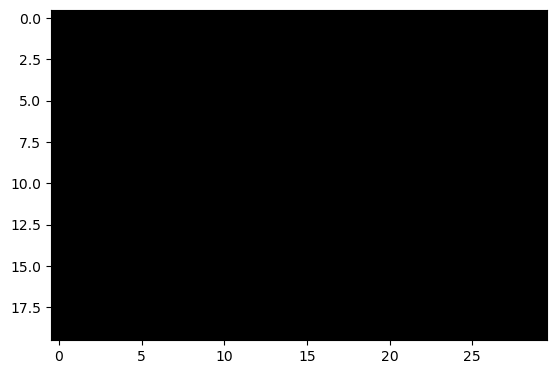

In [30]:
#tamaño de las matrices a visualizar
size=(20,30)

# Una matriz de ceros. 
imagen_negra = np.zeros(size)

#visualizamos la matriz
#Se ve como una imagen negra, ya que todos los elementos (pixeles) tienen intensidad 0
plt.imshow(imagen_negra,vmin=0,vmax=1)
# (es necesario indicar vmin y vmax para que pyplot sepa que el minimo es 0 y el máximo 1)
# (solo imágenes escala de grises)

También podemos generar imágenes blancas, o grises. Si queremos mostrar más de una imagen en una celda, vamos a tener que ejecutar plt.figure() para crear la figura que contenga la imagen.

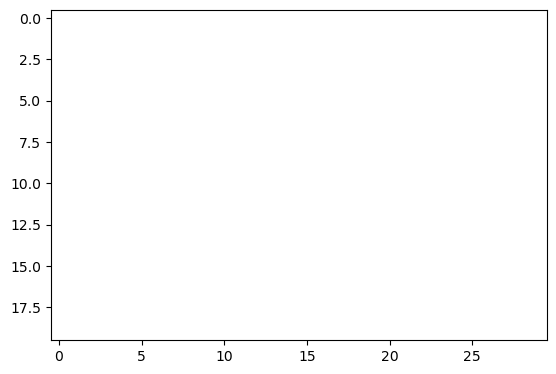

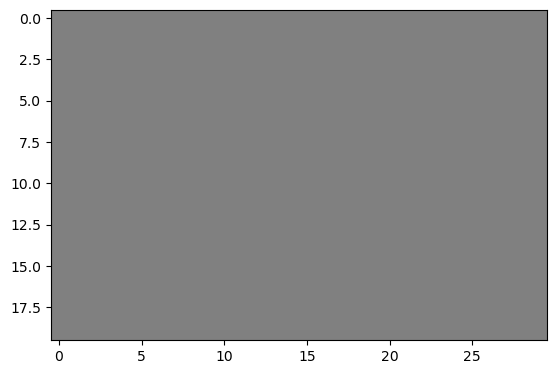

In [31]:
# IMAGEN BLANCA
# Una matriz de unos. 
imagen_blanca = np.ones(size)

#visualizamos la matriz
#Se ve como una imagen blanca, ya que todos los elementos (pixeles) tienen intensidad 1
plt.imshow(imagen_blanca,vmin=0,vmax=1)

#creamos otra figura para mostrar la imagen (sino el proximo imshow sobreescribe al anterior)
plt.figure()

# IMAGEN GRIS
# Una matriz con valor 0.5 en todos sus elementos 
imagen_gris = np.ones(size)*0.5

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_gris,vmin=0,vmax=1)

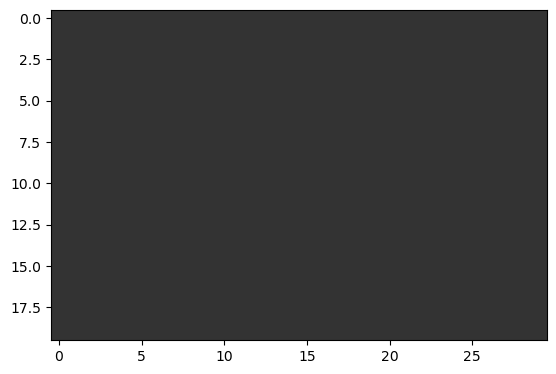

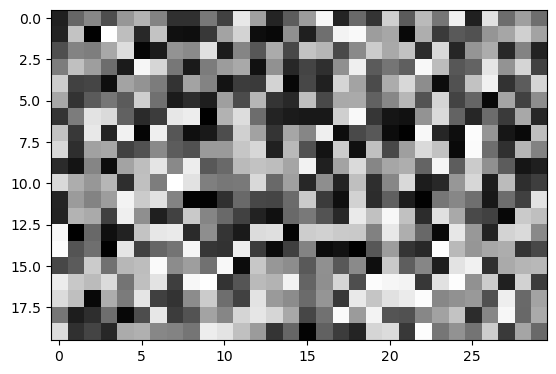

In [32]:
# IMAGEN GRIS OSCURO
# Una matriz con valor 0.2 en todos sus elementos 
imagen_gris_oscuro = np.ones(size)*0.2

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_gris_oscuro,vmin=0,vmax=1)

#creamos otra figura para mostrar la imagen (sino el proximo imshow sobreescribe al anterior)
plt.figure()

# IMAGEN ALEATORIA
# Una matriz con valor aleatorio
imagen_aleatoria = np.random.rand(size[0],size[1])

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_aleatoria,vmin=0,vmax=1)

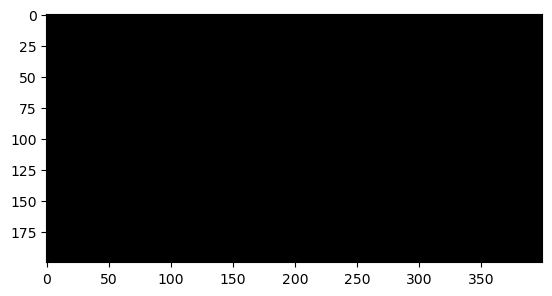

In [51]:
#Ejercicio
# Generar una imagen que sea toda blanca de la mitad para abajo
# Y que la mitad derecha de la parte de arriba sea gris
#      NG
#      BB

altura = 200
anchura = 400
imagen_negra = np.zeros((altura, anchura))

#IMPLEMENTAR

plt.imshow(imagen_negra, cmap='gray')

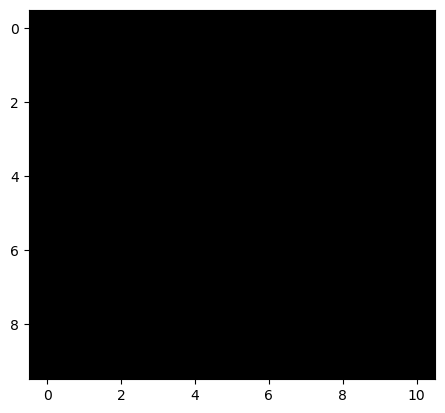

In [52]:
#Ejercicio 
# Modificar la variable imagen_gradiente para que cada fila tenga una intensidad creciente
# La fila 0 debe tener intensidad 0
# La fila 1 debe tener intensidad 0.1
# La fila 2 debe tener intensidad 0.2
# ...
# La fila 9 debe tener intensidad 0.9
# La fila 10 debe tener intensidad 1

imagen_gradiente = np.zeros((10,11))  # Si lo hacemos con una imagen de  (20,11), la transición del gradiente será más suave

# SOLUCIÓN

#IMPLEMENTAR

plt.imshow(imagen_gradiente)

## Lectura de imágenes¶
Para leer imágenes utilizaremos el módulo io de la librería skimage *(pip install scikit-image)*. En ese módulo tenemos la función imread para leer imágenes de un archivo(y también la función imsave para escribirlas a un archivo).

- Dimensiones de la imagen:
(512, 512)


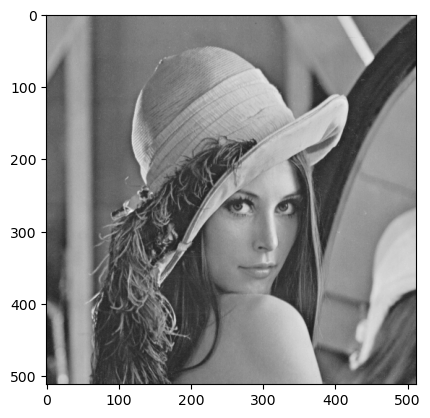

In [37]:
from skimage import io

image=io.imread("./img/lena_gray.png")/255.0 # imread lee las imágenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1

print("- Dimensiones de la imagen:")
print(image.shape)
plt.imshow(image,vmin=0,vmax=1)

Esta es la imágen de Lena; es extremadamente conocida en el área de procesamiento de imágenes porque siempre se usa para evaluar nuevas técnicas y efectos.   

## Imágenes a color
También podemos cargar imágenes a color con imread.

Dimensiones de la imagen:
(512, 512, 3)


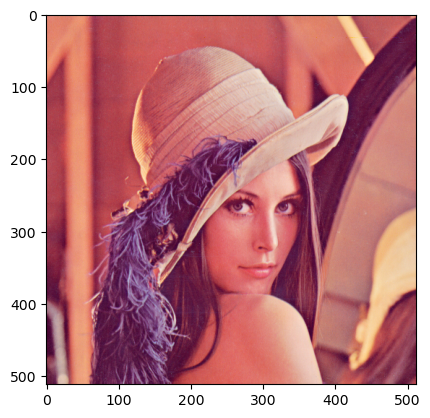

In [38]:
lena_rgb=io.imread("./img/lena.png")/255.0 # imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
plt.imshow(lena_rgb) # no es necesario el vmin/vmax para imágenes a color

print("Dimensiones de la imagen:")
print(lena_rgb.shape)

En este caso, tenemos tres dimensiones. Las primeras dos, de tamaño  512, corresponden a la cantidad de pixeles de la imagen. La última, de tamaño 3, contiene los tres canales R, G y B de la imagen.

Podemos ver cada canal individualmente, como si el canal fuera una imagen en escala de grises, para ver la intensidad de cada canal.

Text(0.5, 1.0, 'Canal Azul')

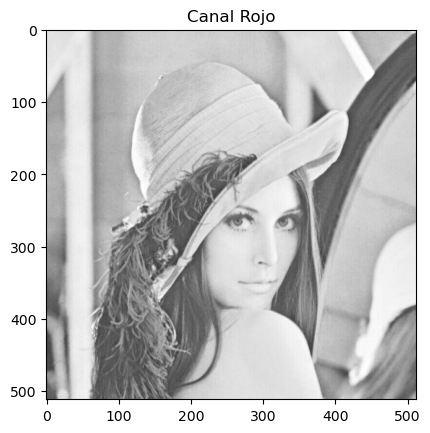

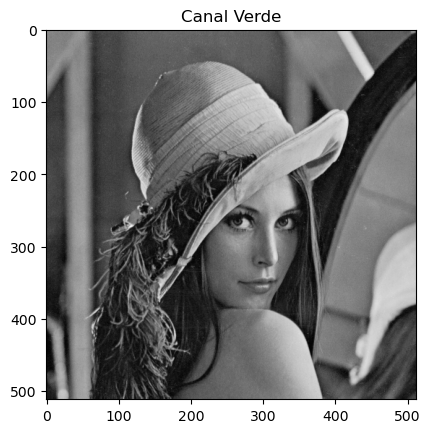

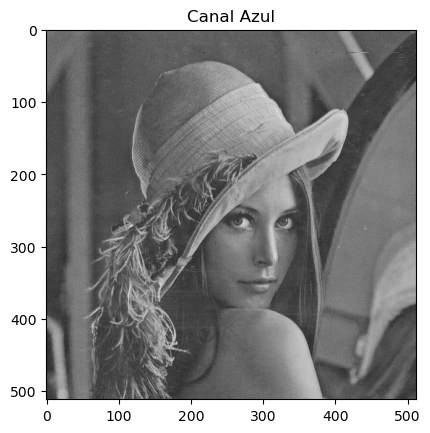

In [39]:
plt.imshow(lena_rgb[:,:,0],vmin=0,vmax=1)
plt.title("Canal Rojo")
plt.figure()
plt.imshow(lena_rgb[:,:,1],vmin=0,vmax=1)
plt.title("Canal Verde")
plt.figure()
plt.imshow(lena_rgb[:,:,2],vmin=0,vmax=1)
plt.title("Canal Azul")

Podemos ver que el canal rojo es el más activo, ya que la imagen contiene mucha piel y un fondo crema/anaranjado. Además, el canal verde es el que tiene más detalles de la imagen.

Otra manera de ver la información de cada canal es quitar la información de los otros canales. Por ejemplo, para ver el canal rojo, ponemos en 0 los canales azul y verde.

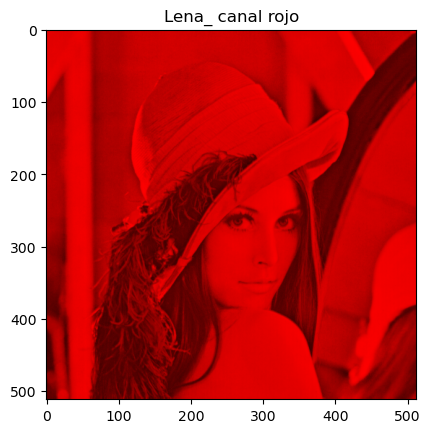

In [40]:
lena_red=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red[:,:,1]=0
lena_red[:,:,2]=0
plt.title("Lena_ canal rojo")
plt.imshow(lena_red)

Podemos observar que sin los canales azul y verde perdemos bastante información de color, aunque la silueta se mantiene.

Ahora probemos quitando sólo un canal, por ejemplo, el azul:

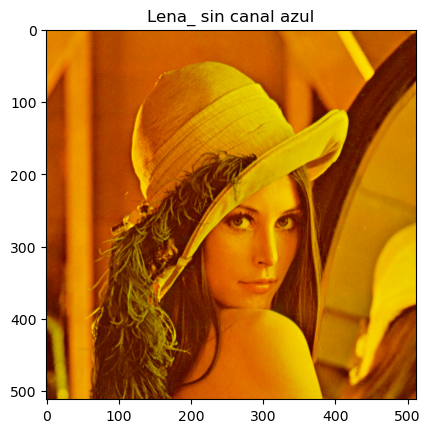

In [41]:
lena_red_green=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red_green[:,:,2]=0
plt.title("Lena_ sin canal azul")
plt.imshow(lena_red_green)

De nuevo, se ha perdido información color, pero mucho menos, ya que justamente el canal azul era el menos importante.

## Conversión de color a escala de grises
La conversión de una imagen de color a escala de grises se puede hacer de varias formas. 

El pixel $(1,1,1)$ representa el blanco y el $(0,0,0)$ el negro en RGB. Entonces, cuanto más grandes son los valores de los canales, más "blanco" es el pixel y viceversa. 

Por eso, una forma simple para hacer la conversión consiste en sacar el promedio de los canales y usar eso como la intensidad. 

Entonces cada trio $(r,g,b)$ que representa un pixel se reemplaza por su promedio $\frac{(r+g+b)}{3}$.

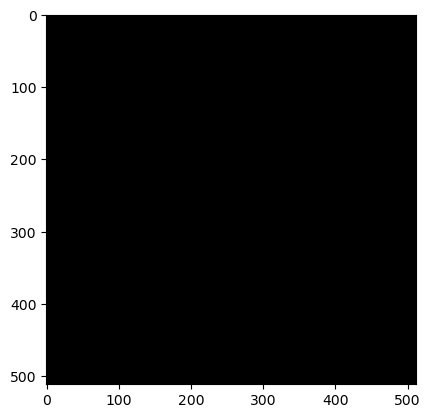

In [53]:
# Ejercicio: Convertir la imagen de lena color a escala de grises

h,w,c=lena_rgb.shape # obtenemos el tamaño de la imagen original

lena_gris=np.zeros((h,w)) # creamos una matriz donde generar la imagen

for i in range(h):
    for j in range(w):
        pass
        #IMPLEMENTAR
        # calcular el promedio de los canales r,g,b del pixel i,j con la imagen original
        # guardar ese promedio en el pixel i,j de la imagen generada


plt.imshow(lena_gris)    

In [54]:
# Ejercicio: Convertir la imagen de lena color a escala de grises, pero sin usar fors
# Sumar los canales individuales y dividirlos por 3.

lena_gris_simple=0 #IMPLEMENTAR


#plt.imshow(lena_gris_simple) #descomentar para probar

## Guardar imágenes   

Una primera opción es normalizar primero la imagen para asegurar que los valores estén en el rango [0, 1].   
Seguidamente, multiplicar los valores normalizados por 255 para escalarlos al rango [0, 255] y finalmente convertir a uint8.

In [ ]:
# Normalizar la imagen para que esté en el rango [0, 1]
lena_gris_normalizada = (lena_gris - np.min(lena_gris)) / (np.max(lena_gris) - np.min(lena_gris))
# Escalar los valores al rango [0, 255] y convertir a uint8
lena_gris_uint8 = (lena_gris_normalizada * 255).astype(np.uint8)
#guardamos la imagen de lena gris generada
io.imsave("lena_generada1.png",lena_gris_uint8)

También existen otras opciones como, por ejemplo, guardar la imagen como un tipo de datos flotante.  
Para ello se debe especificar explícitamente el modo de almacenamiento al guardar la imagen. Por ejemplo, usando el argumento plugin de **io.imsave()** para especificar el plugin de almacenamiento PIL (biblioteca Python Imaging Library) con el que realizamos la operación de guardado y el tipo (dtype) correspondiente al punto flotante (float32)

In [50]:
io.imsave("lena_generada2.png", lena_gris, plugin='pil', dtype=np.float32)